In [1]:
import numpy as np
def mvn_rand(mu_delta, dims=4):
    mu = np.random.random_sample(dims) + mu_delta
    A = np.random.random_sample(dims * dims).reshape(-1, dims)
    return np.random.multivariate_normal(mu, A.T @ A, size=100)
# generate the sample and color each cluster
np.random.seed(102)
sample = np.vstack((mvn_rand(2), mvn_rand(0), mvn_rand(-2)))
col = np.repeat(['red', 'green', 'blue'], 100)

In [7]:
import tensorflow as tf
# define input and weight matrices
x = tf.placeholder(shape=[None, 4], dtype=tf.float32)
w1 = tf.Variable(tf.truncated_normal(stddev=.1, shape=[4, 12]), 
                 dtype=tf.float32)
w2 = tf.Variable(tf.truncated_normal(stddev=.1, shape=[12, 2]), 
                 dtype=tf.float32)
# neural network
hidden_1 = tf.nn.tanh(tf.matmul(x, w1))
projection = tf.matmul(hidden_1, w2)
hidden_2 = tf.nn.tanh(projection)
hidden_3 = tf.nn.tanh(tf.matmul(hidden_2, tf.transpose(w2)))
y = tf.matmul(hidden_3, tf.transpose(w1))
# loss function and optimizer
loss = tf.reduce_mean(tf.reduce_sum((x - y) * (x - y), 1))
optimize = tf.train.AdamOptimizer().minimize(loss)
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [9]:
import matplotlib.pyplot as plt

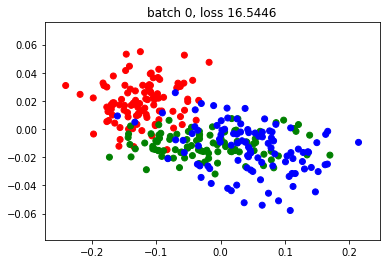

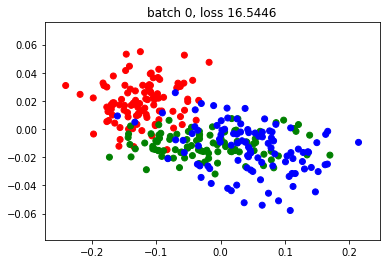

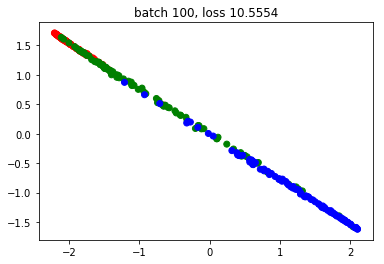

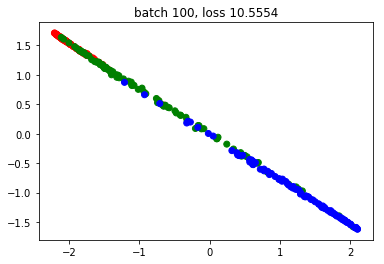

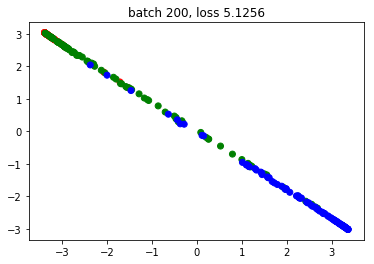

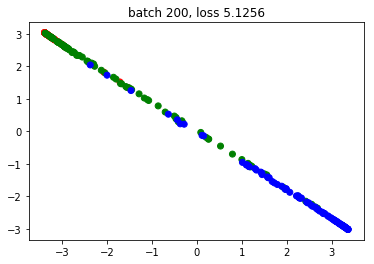

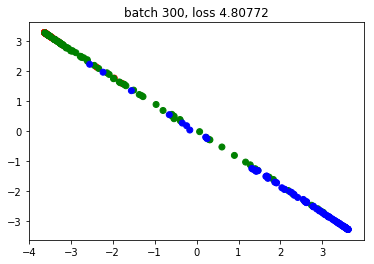

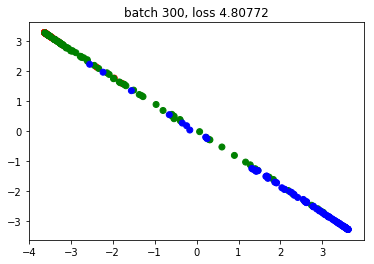

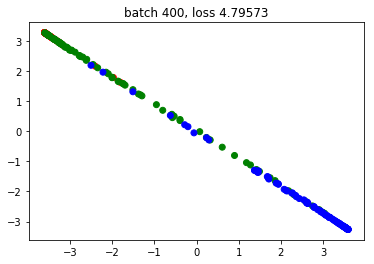

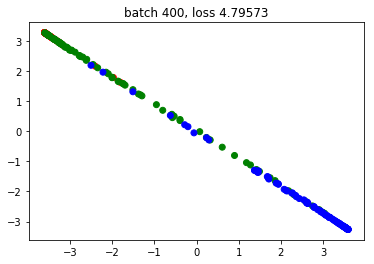

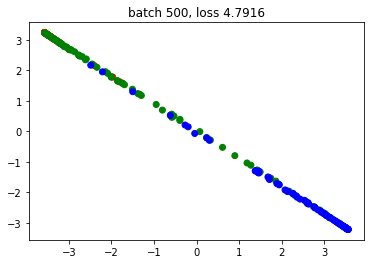

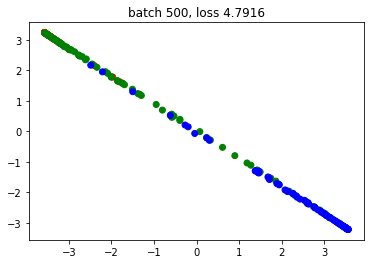

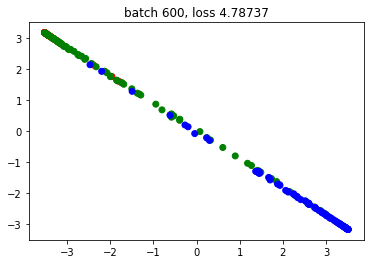

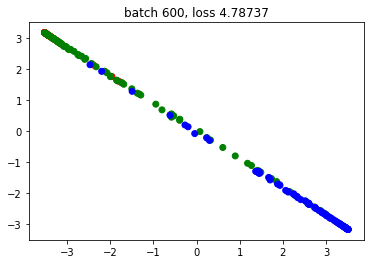

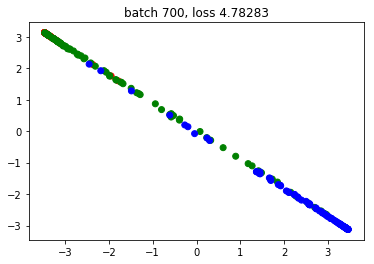

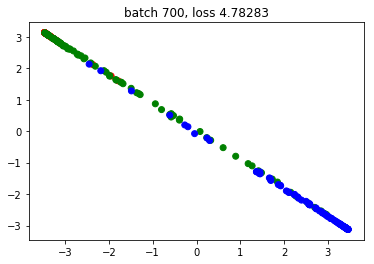

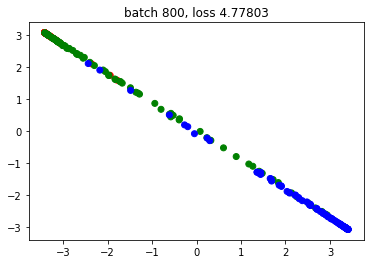

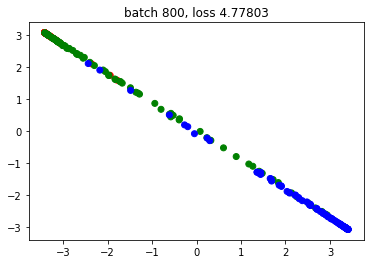

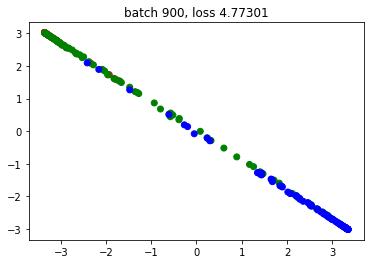

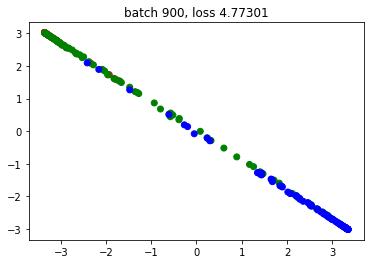

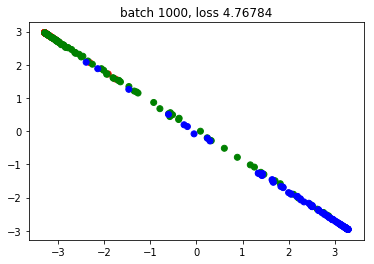

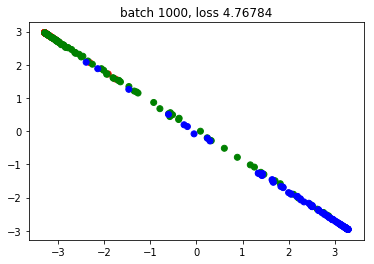

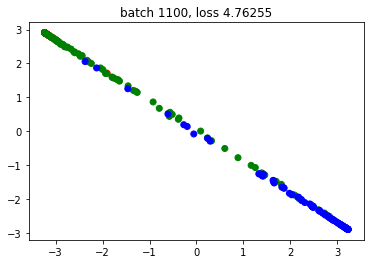

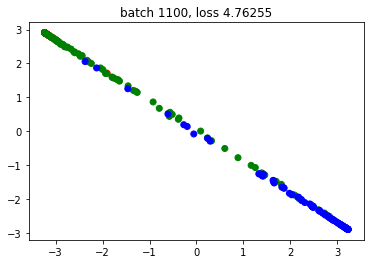

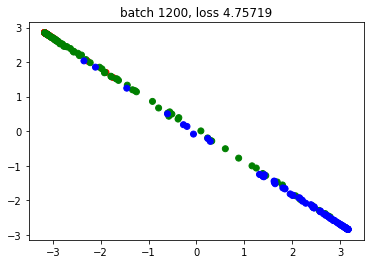

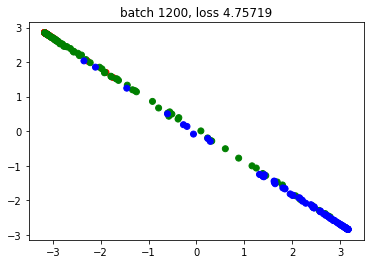

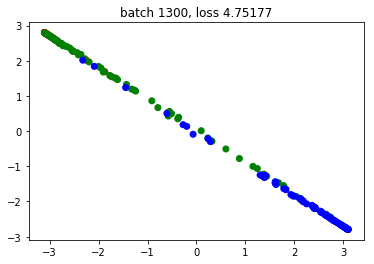

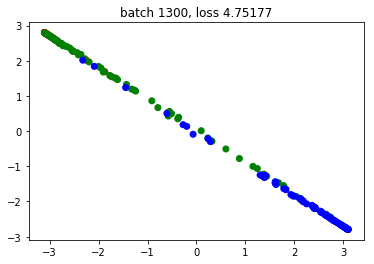

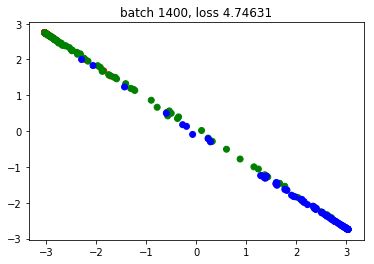

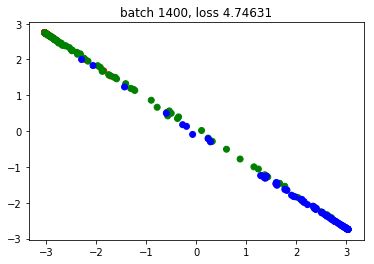

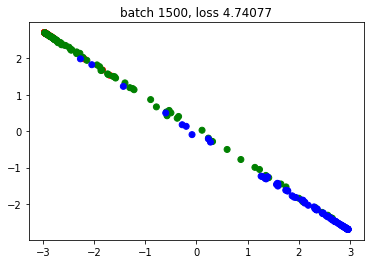

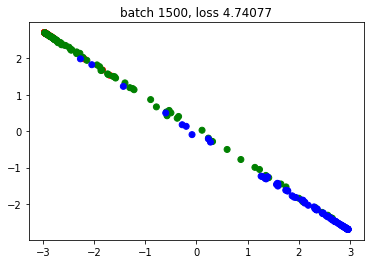

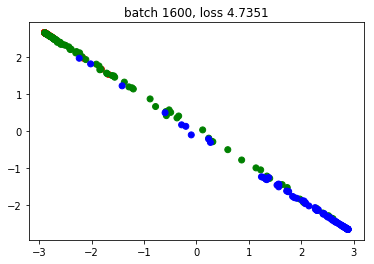

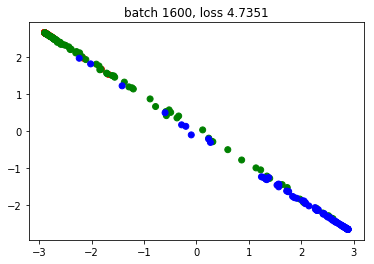

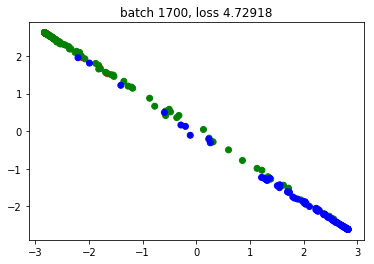

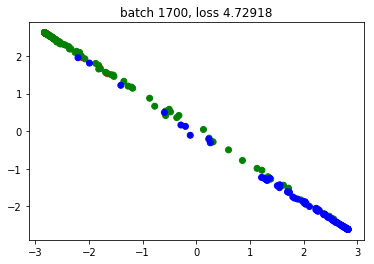

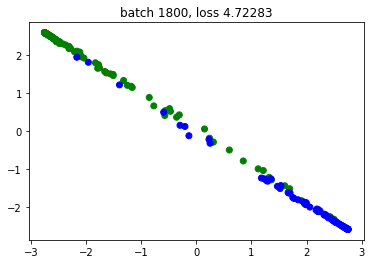

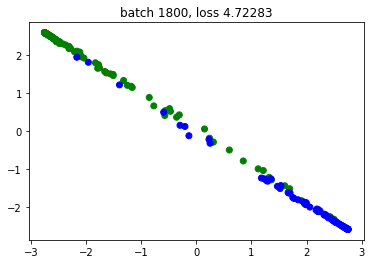

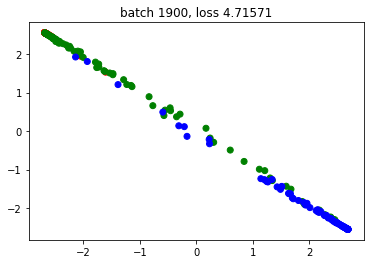

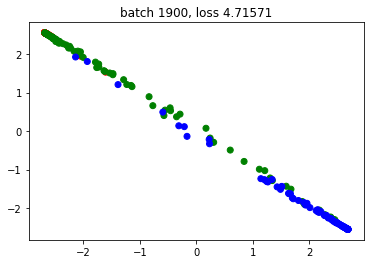

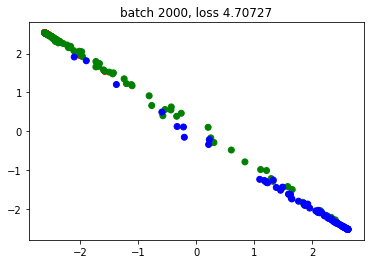

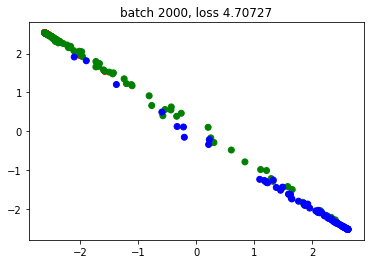

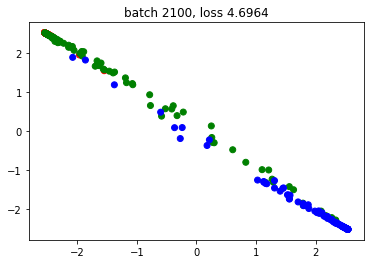

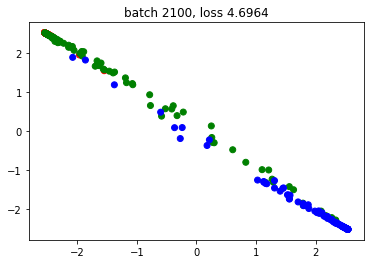

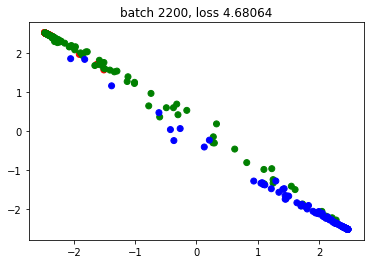

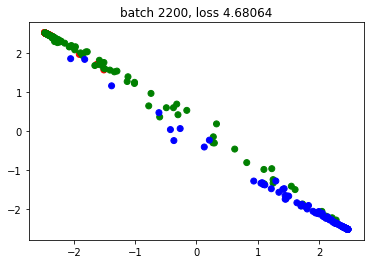

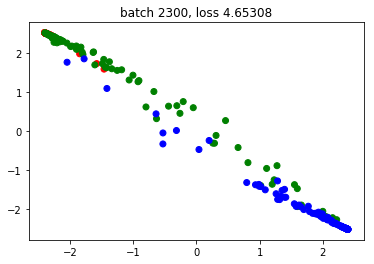

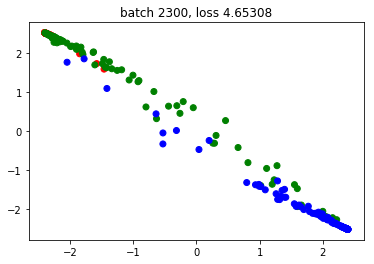

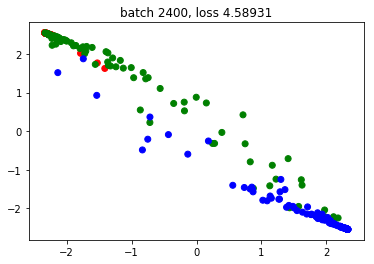

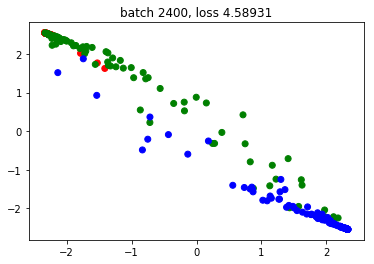

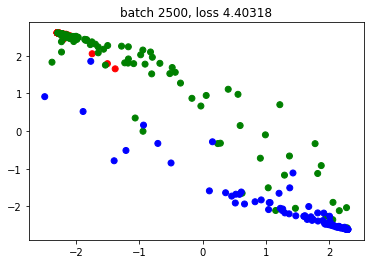

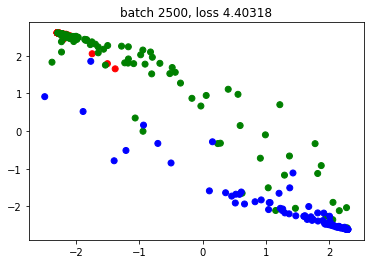

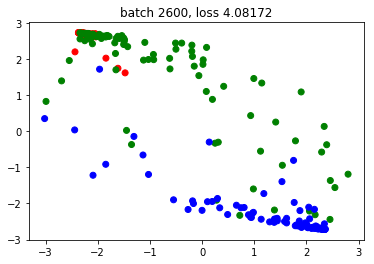

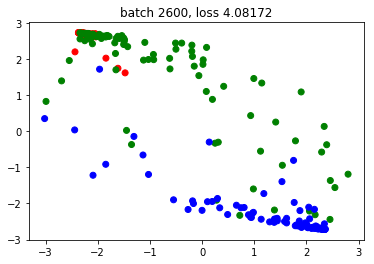

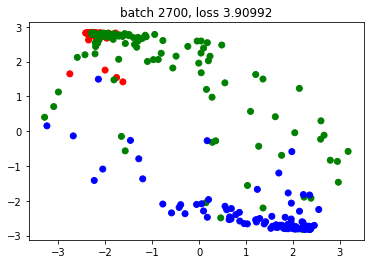

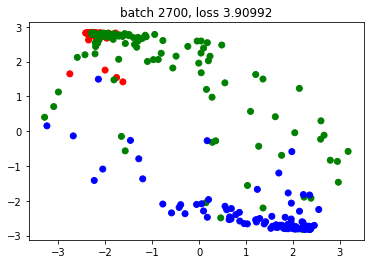

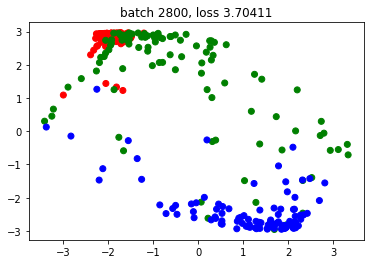

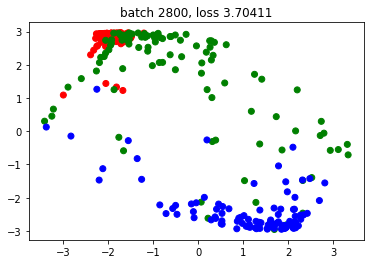

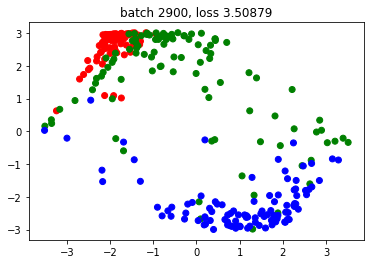

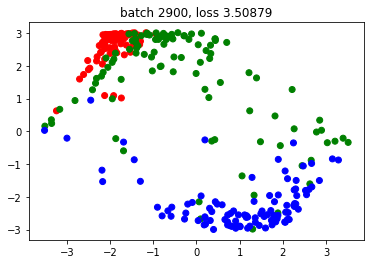

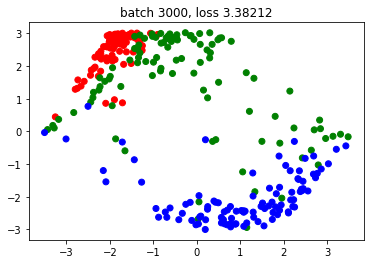

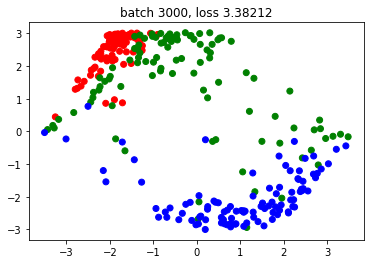

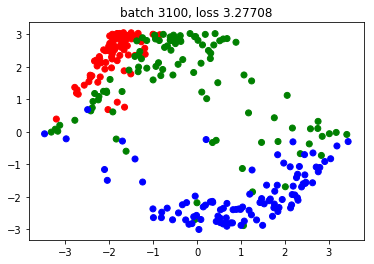

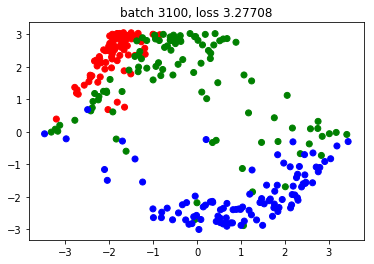

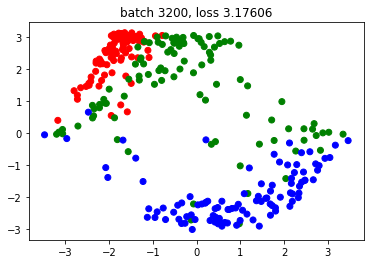

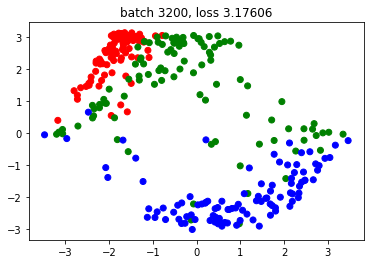

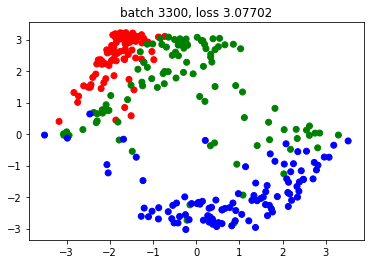

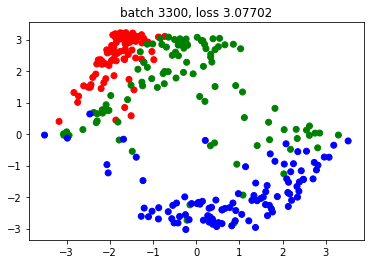

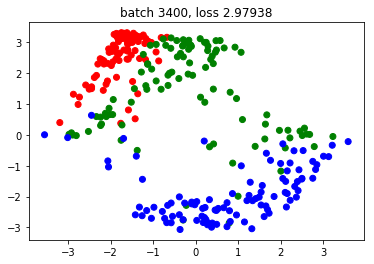

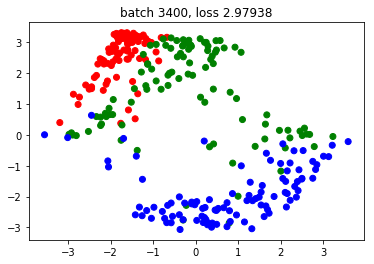

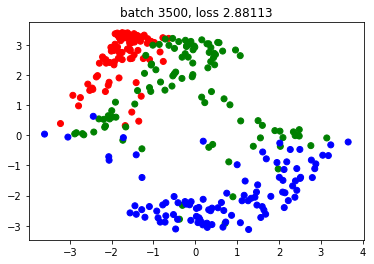

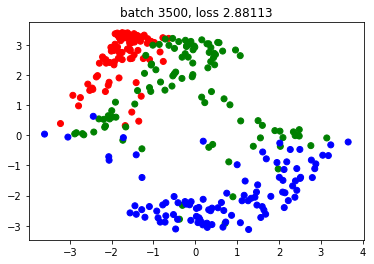

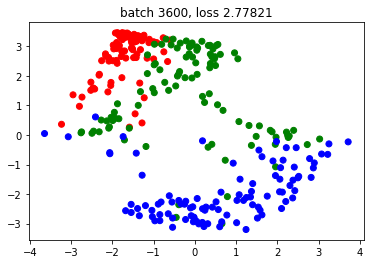

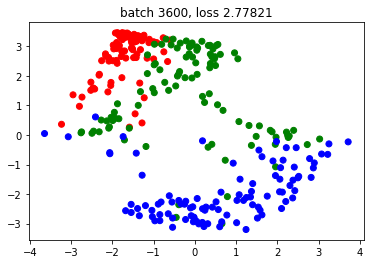

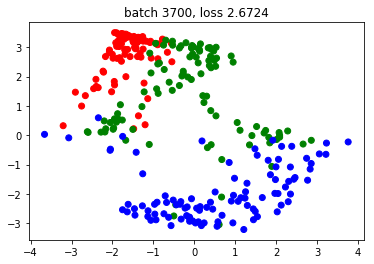

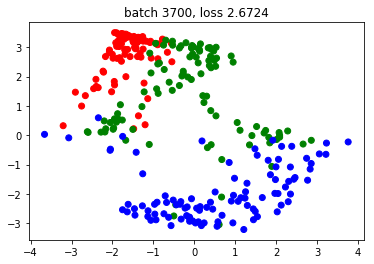

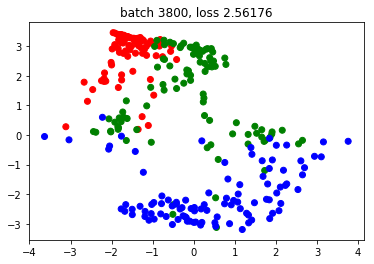

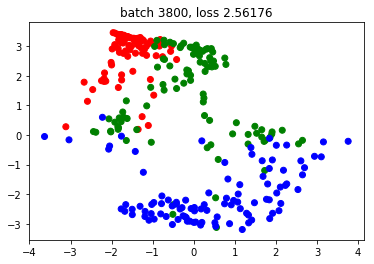

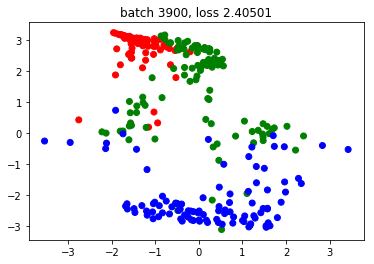

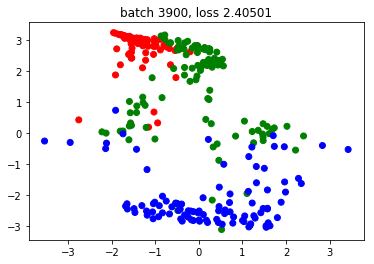

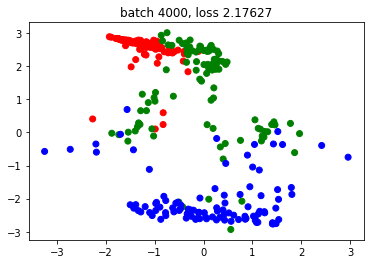

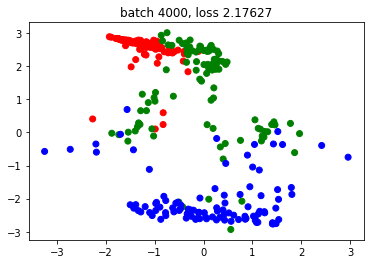

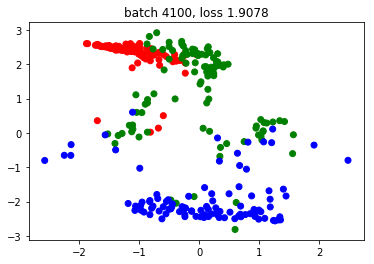

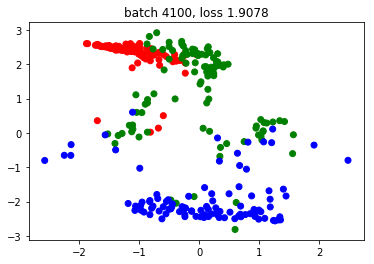

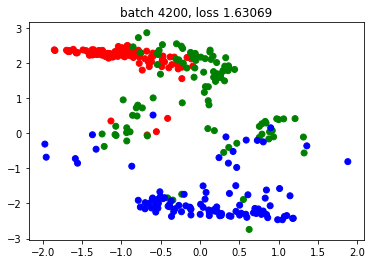

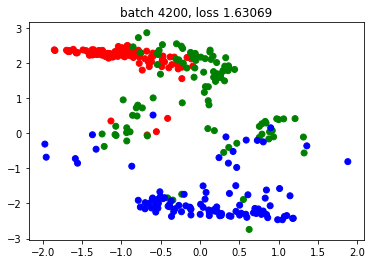

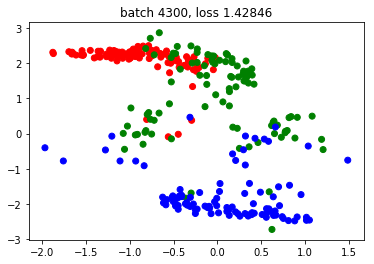

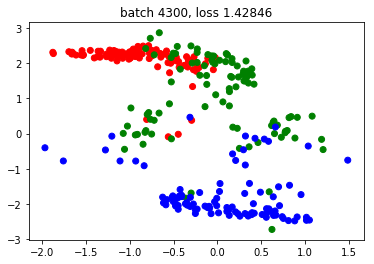

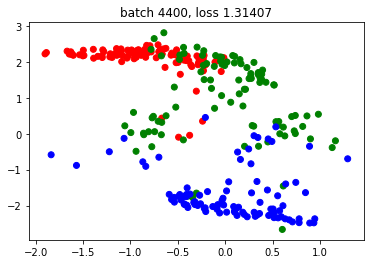

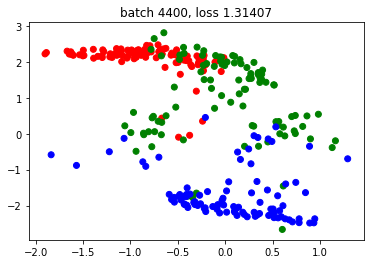

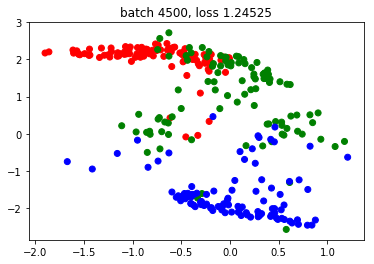

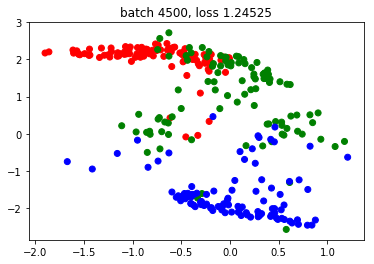

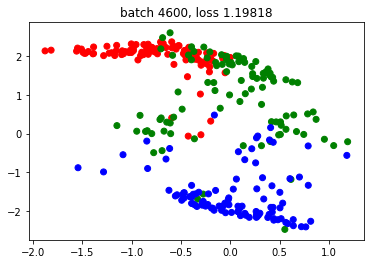

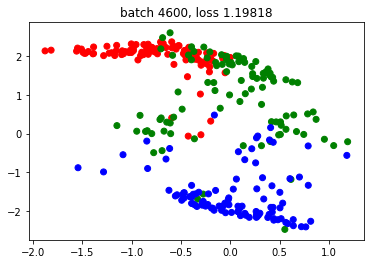

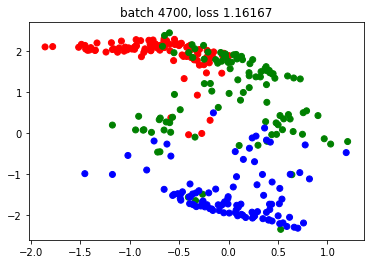

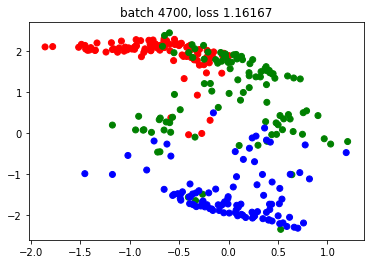

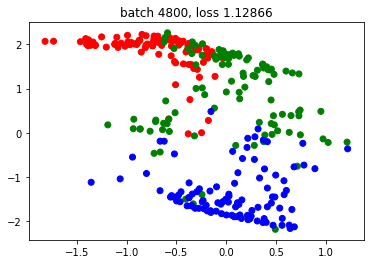

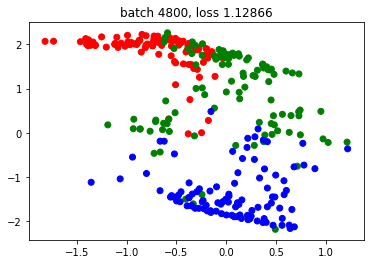

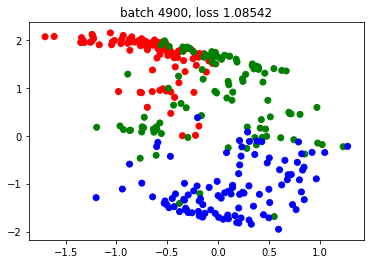

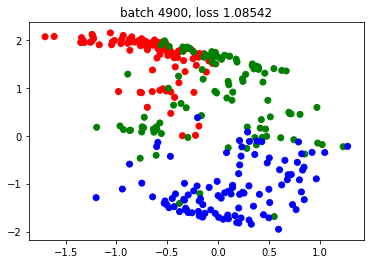

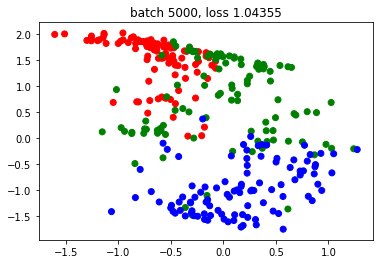

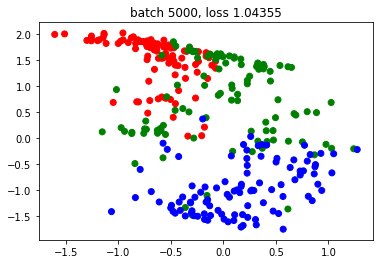

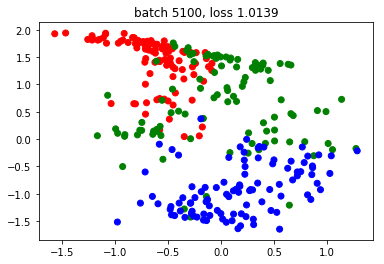

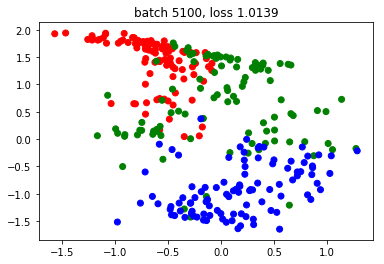

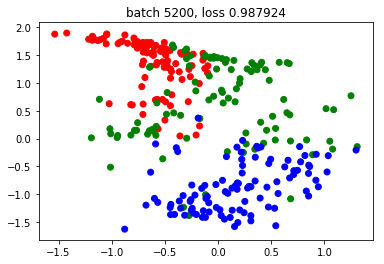

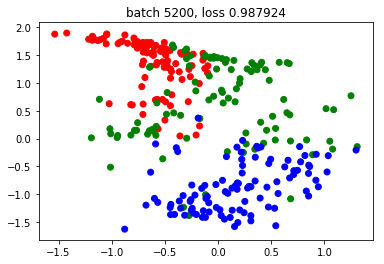

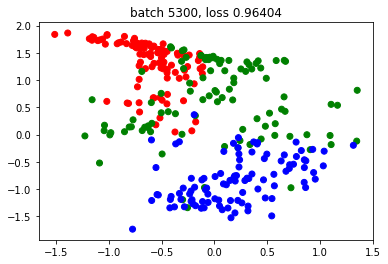

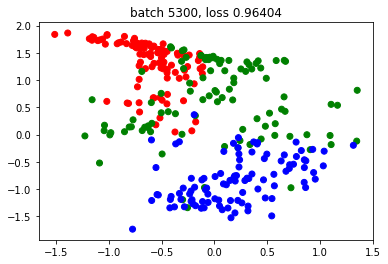

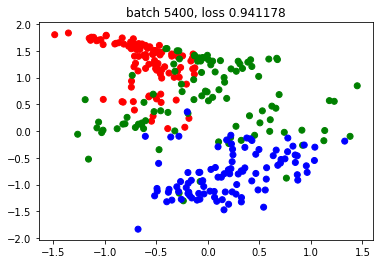

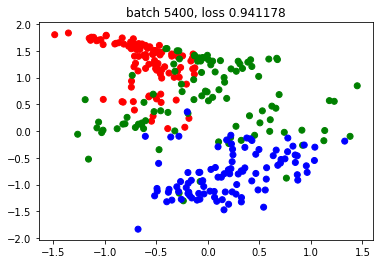

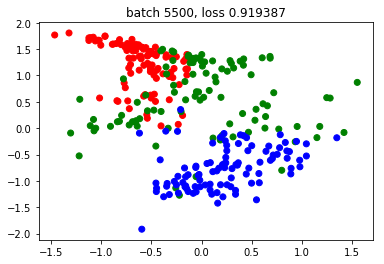

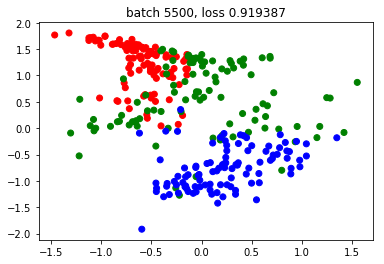

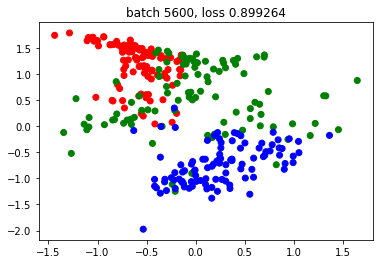

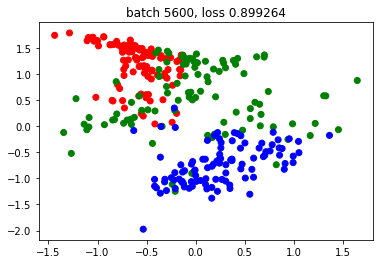

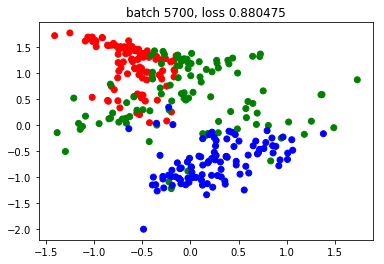

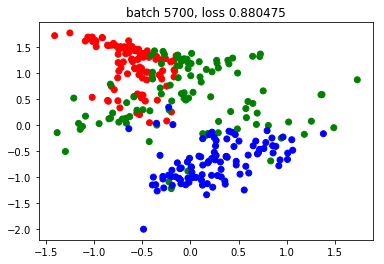

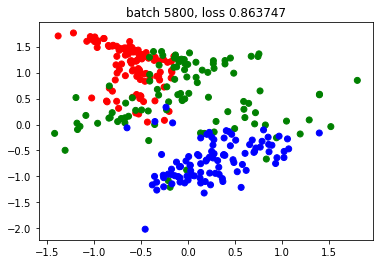

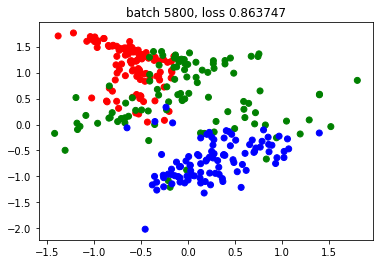

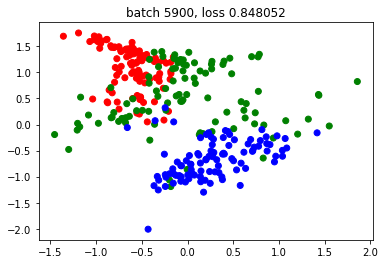

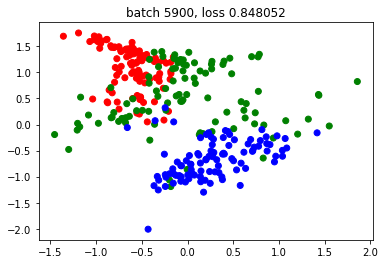

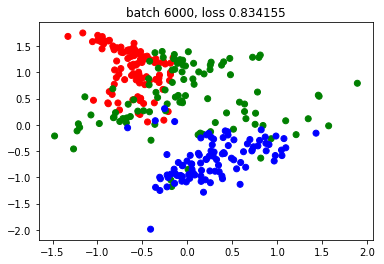

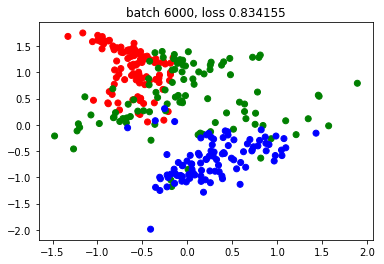

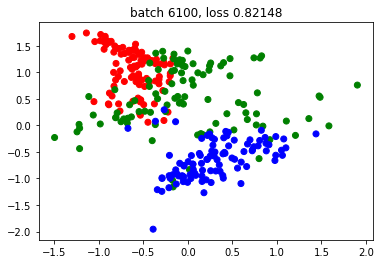

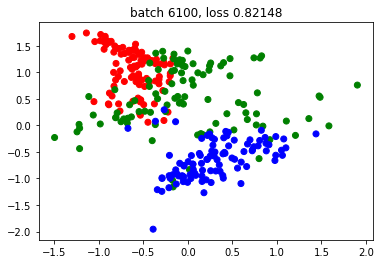

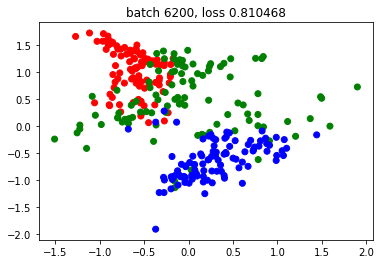

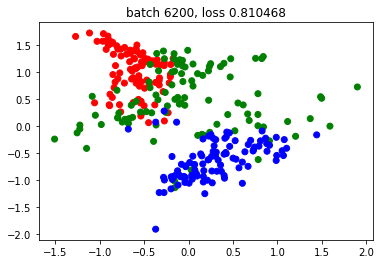

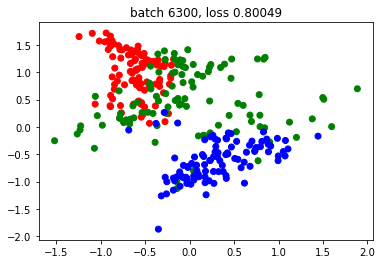

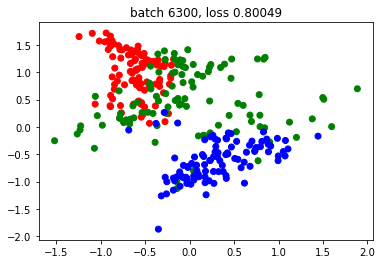

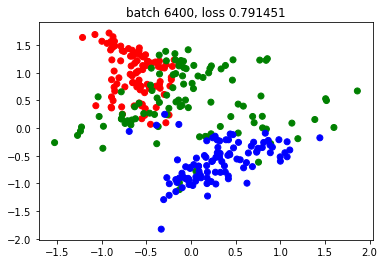

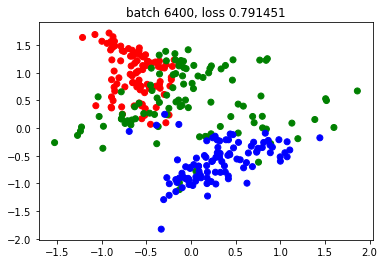

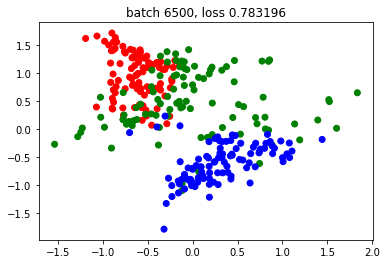

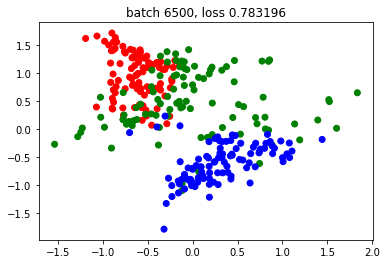

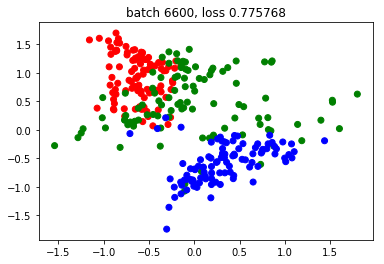

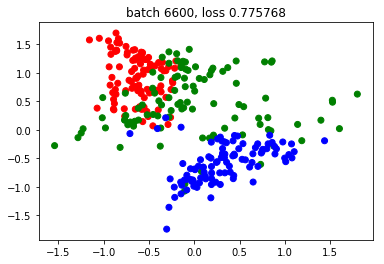

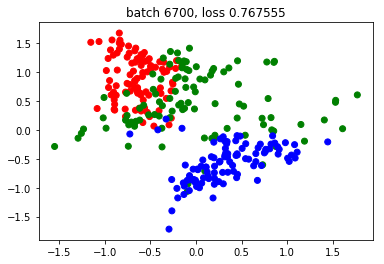

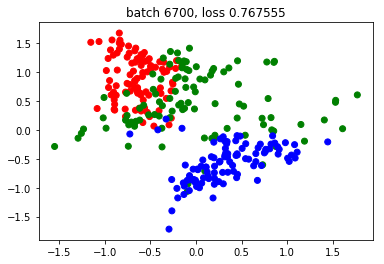

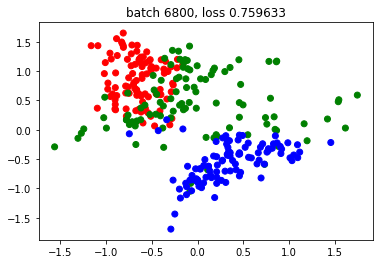

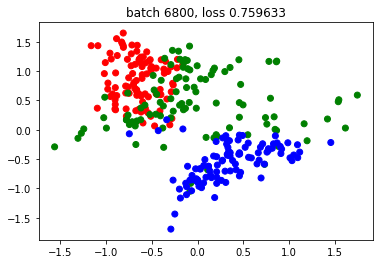

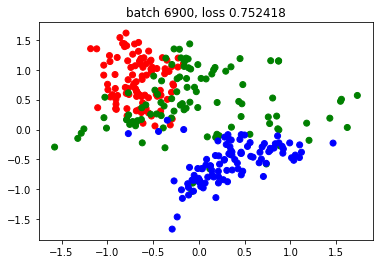

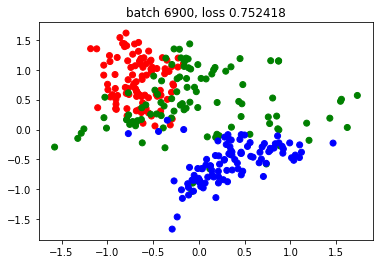

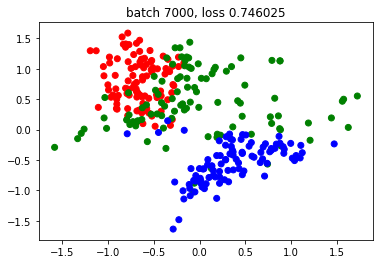

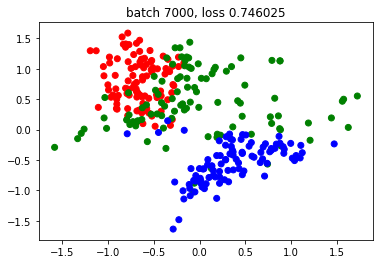

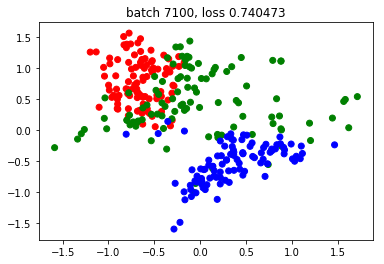

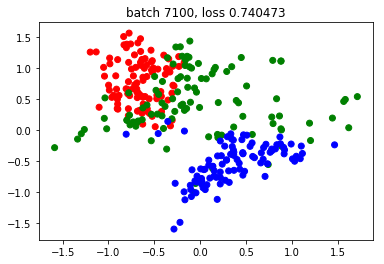

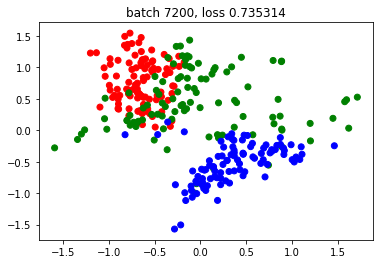

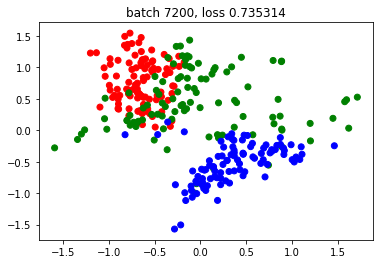

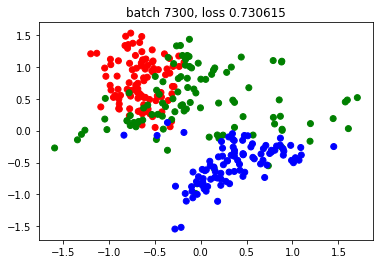

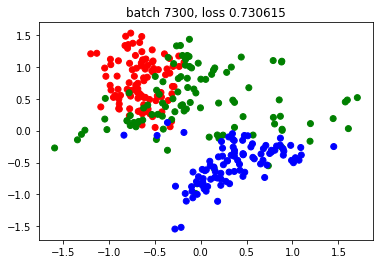

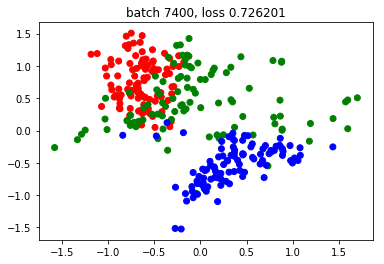

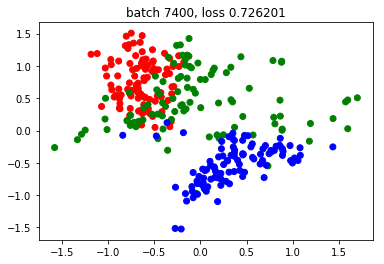

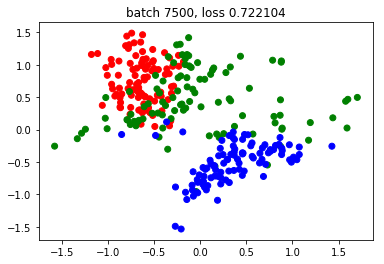

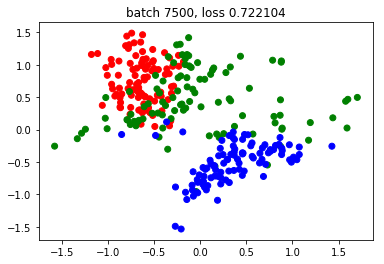

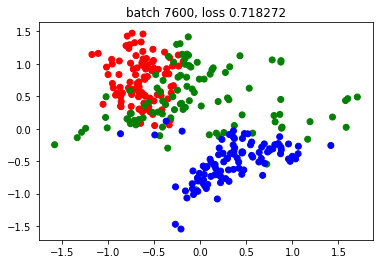

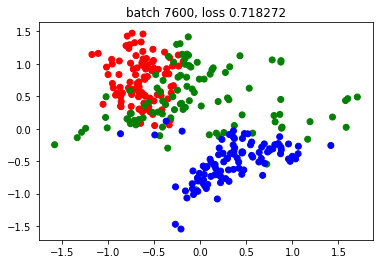

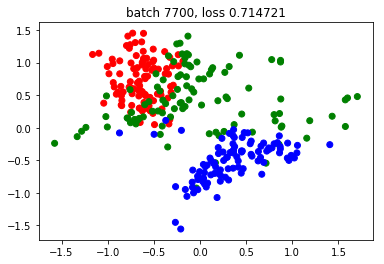

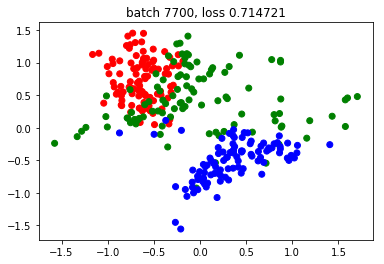

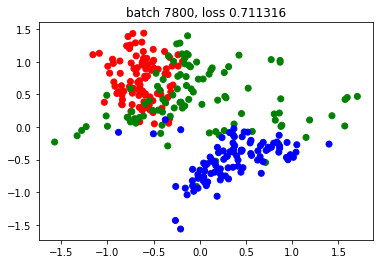

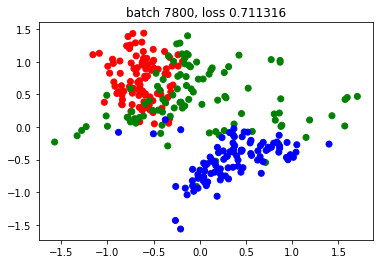

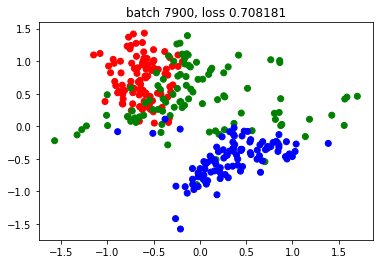

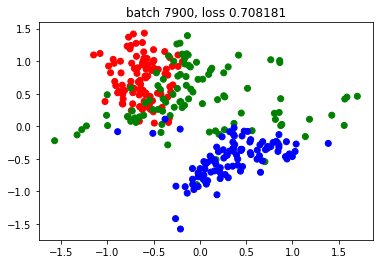

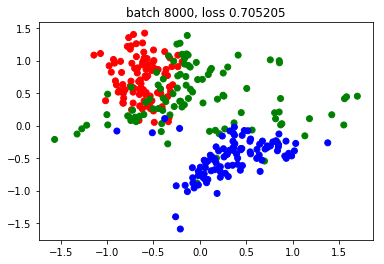

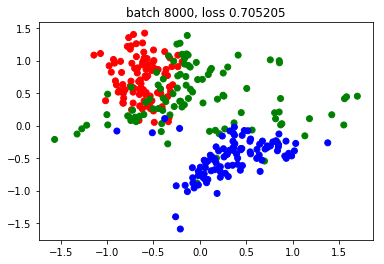

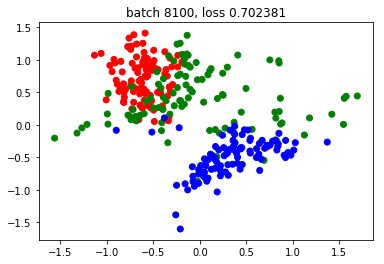

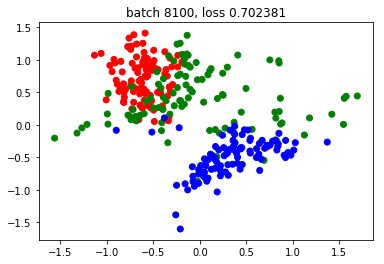

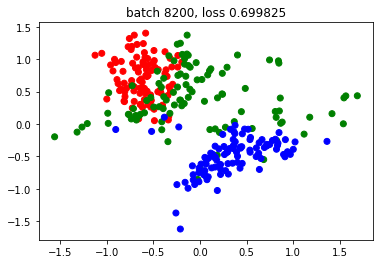

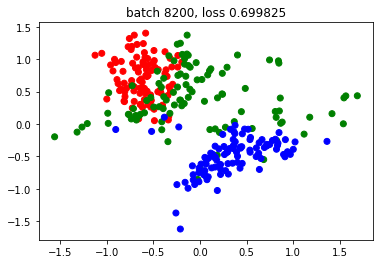

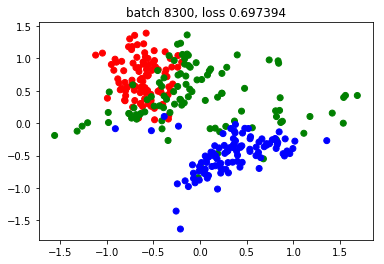

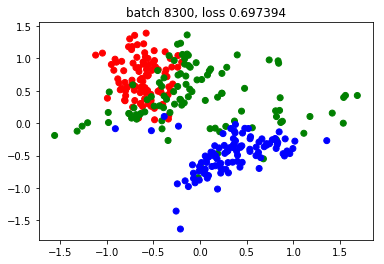

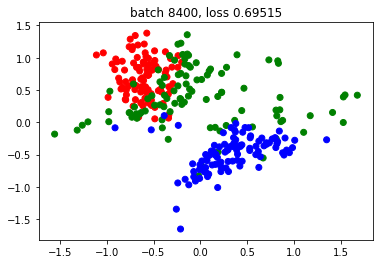

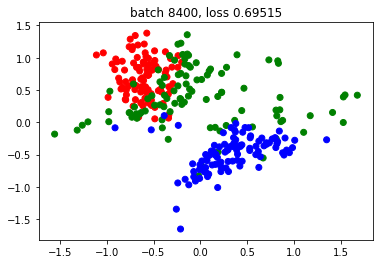

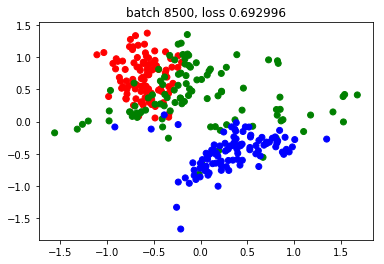

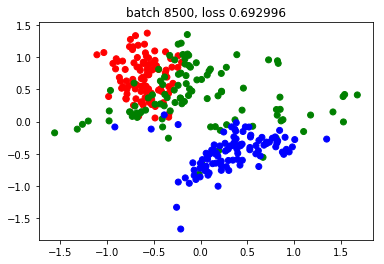

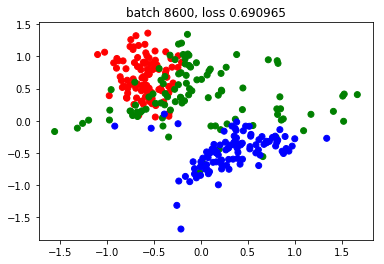

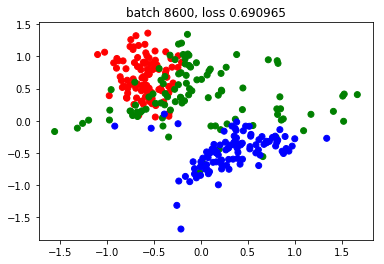

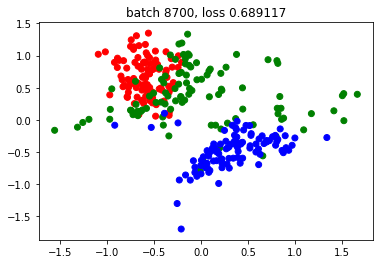

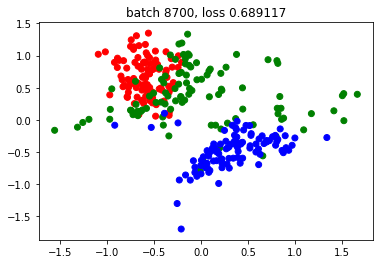

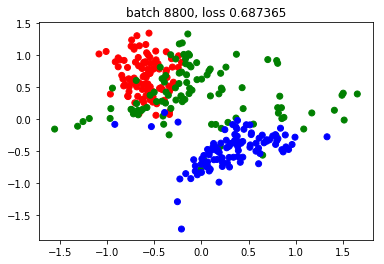

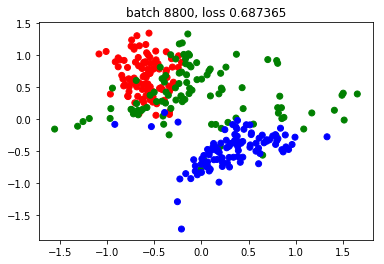

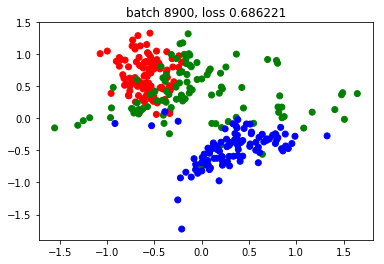

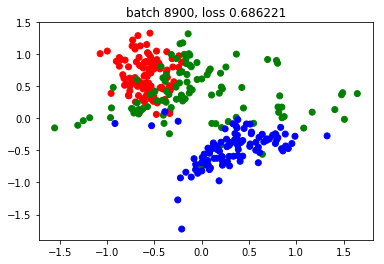

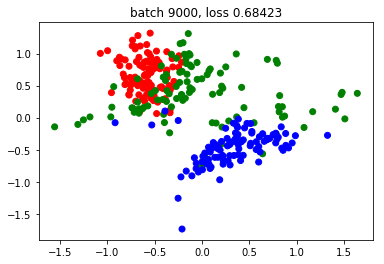

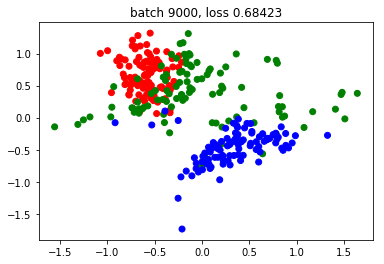

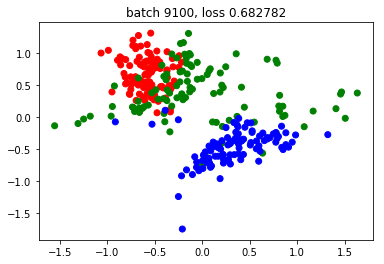

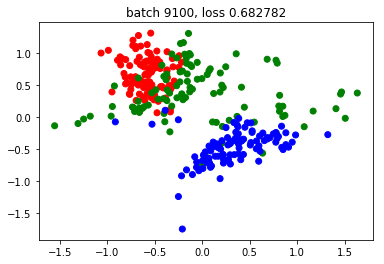

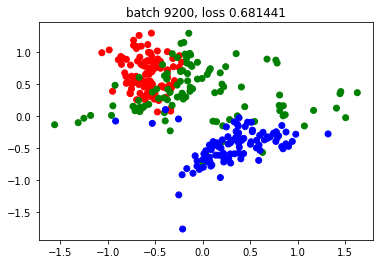

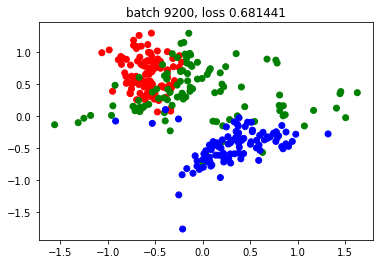

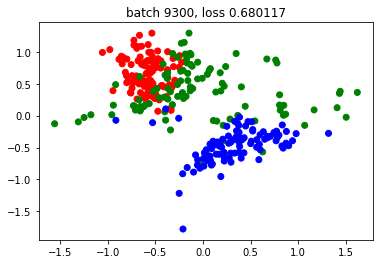

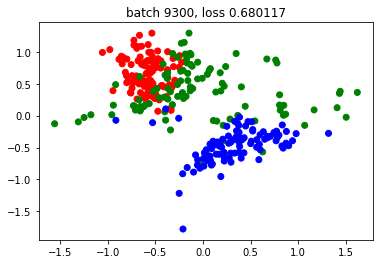

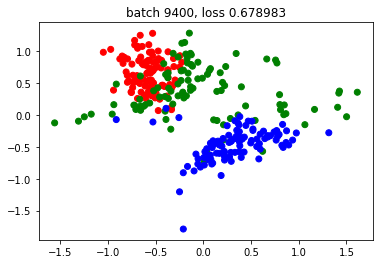

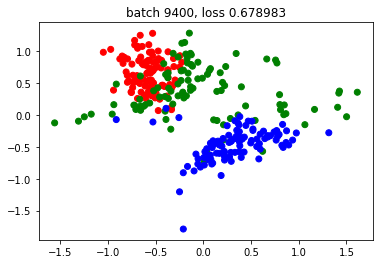

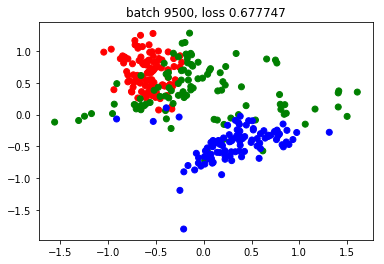

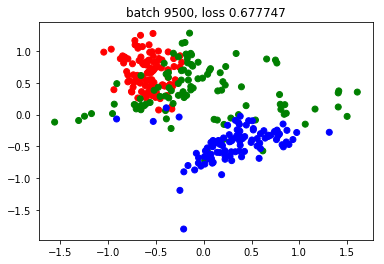

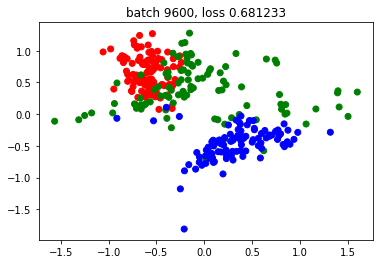

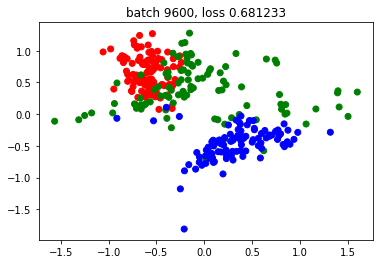

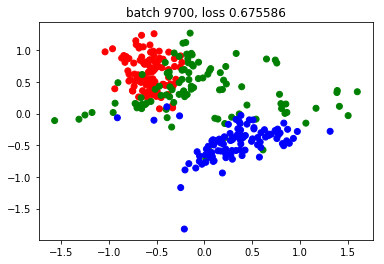

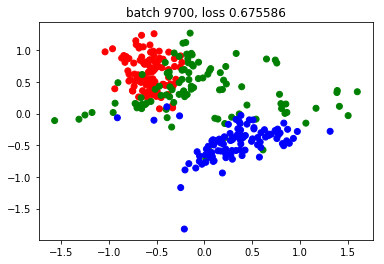

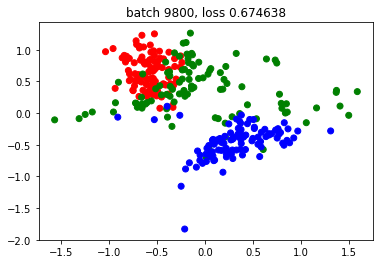

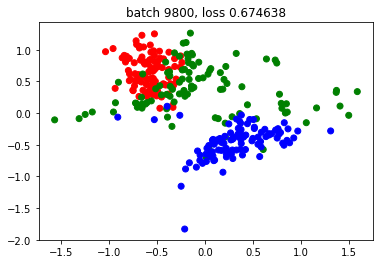

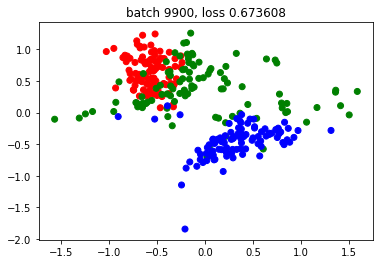

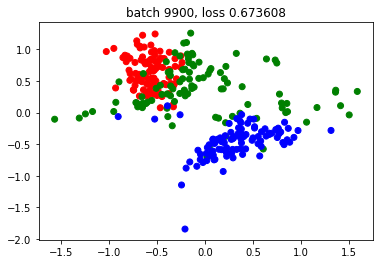

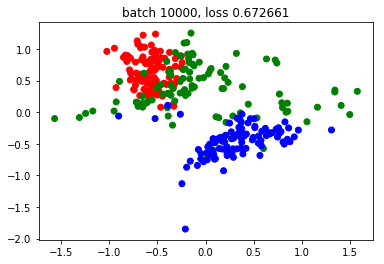

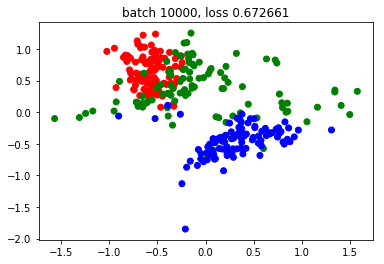

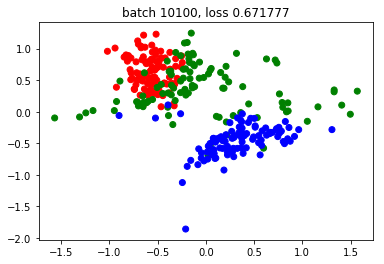

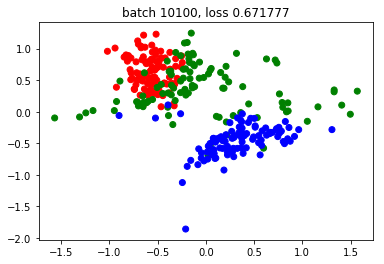

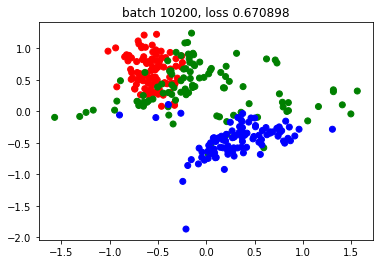

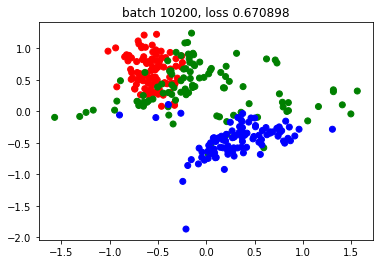

KeyboardInterrupt: 

In [10]:
# training


with tf.Session() as session:
    session.run(init)
    feed_dict = {x: sample}

    for batch in range(50000):
        session.run(optimize, feed_dict=feed_dict)

        eval_loss, eval_2d = session.run([loss, projection],
                                         feed_dict=feed_dict)

        # plot projection
        if batch % 100 == 0:
            plt.clf()
            plt.scatter(eval_2d[:, 0], eval_2d[:, 1], c=col)
            plt.title('batch %d, loss %g' % (batch, eval_loss))
            plt.show(False)
            plt.pause(0.001)